### ultra-marathon running

The data in this file is a large collection of ultra-marathon race records registered between 1798 and 2022 (a period of well over two centuries) being therefore a formidable long term sample. All data was obtained from public websites.

Despite the original data being of public domain, the race records, which originally contained the athlete´s names, have been anonymized to comply with data protection laws and to preserve the athlete´s privacy. However, a column Athlete ID has been created with a numerical ID representing each unique runner (so if Antonio Fernández participated in 5 races over different years, then the corresponding race records now hold his unique Athlete ID instead of his name). This way I have preserved valuable information.

The dataset contains 7,461,226 ultra-marathon race records from 1,641,168 unique athletes.

The following columns (with data types) are included:

Year of event (int64)

Event dates (object)

Event name (object)

Event distance/length (object)

Event number of finishers (int64)

Athlete performance (object)

Athlete club (object)

Athlete country (object)

Athlete year of birth (float64)

Athlete gender (object)

Athlete age category (object)

Athlete average speed (object)

Athlete ID (int64)

Dataset link : https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [3]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [5]:
df.shape

(7461195, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


Clean up


Only want usa races with 50 km or 50mi , 2020 


Step 1  show 50 mi or 50 km 

50km

50mi

In [7]:
# Combine 50km/50mi with isin
df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [8]:
df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split("(").str.get(1).str.split(')').str.get(0)

51923      USA
51924      USA
51925      USA
51926      USA
51927      USA
          ... 
6417091    USA
6417092    USA
6417093    USA
6417094    USA
6417095    USA
Name: Event name, Length: 338, dtype: object

In [9]:
df[df['Event name'].str.split("(").str.get(1).str.split(')').str.get(0) == 'USA']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [10]:
#combine all the filters togethers 
df_2 = df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split("(").str.get(1).str.split(')').str.get(0) == 'USA')]

In [11]:
df_2.shape

(26090, 13)

In [12]:
# removing spaces and making every letters lower
df_2.columns = df_2.columns.str.replace(" ","_").str.lower()

In [13]:
df_2.head()

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [14]:
# remove (USA) from event name 
df_2['event_name'] = df_2['event_name'].str.split('(').str.get(0)

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\3929851188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['event_name'] = df_2['event_name'].str.split('(').str.get(0)


In [15]:
# checking to see if (USA) is removed or no 
df_2.head()

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [16]:
# making a new col for the exact age of the athlete 
df_2['athlete_age'] = 2020 - df_2['athlete_year_of_birth']

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\2927257973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['athlete_age'] = 2020 - df_2['athlete_year_of_birth']


In [20]:
# Removing h from athlete performance 
df_2['athlete_performance'] = df_2['athlete_performance'].str.split(" ").str.get(0)

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\2555862235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['athlete_performance'] = df_2['athlete_performance'].str.split(" ").str.get(0)


In [21]:
df_2.head()

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_club,athlete_country,athlete_year_of_birth,athlete_gender,athlete_age_category,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [25]:
# Dropping unnecessary coloumns : athlete_club , athlete_country ,athlete_year_of_birth , athlete_age_category
df_2.drop(['athlete_club','athlete_country','athlete_year_of_birth','athlete_age_category'], axis = 1 ,inplace = True)
df_2.head()


c:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [26]:
# Clean up null values 
df_2.isna().sum()

year_of_event                  0
event_dates                    0
event_name                     0
event_distance/length          0
event_number_of_finishers      0
athlete_performance            0
athlete_gender                 0
athlete_average_speed          0
athlete_id                     0
athlete_age                  233
dtype: int64

In [28]:
df_2.query('athlete_age.isna()== 1')

,year_of_event,event_dates,event_name,event_distance/length,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [79]:
df_2.rename(columns={'event_distance/length': 'race_length'},inplace=True)

In [80]:
df_2.dropna(inplace=True)

c:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [81]:
df_2.shape

(25857, 10)

In [82]:
#Check for duplicates value 
df_2.duplicated().sum()

0

In [83]:
# Reset index 
df_2.reset_index(drop = True)


,year_of_event,event_dates,event_name,race_length,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39


In [84]:
#Fixing some data types 
df_2.dtypes

year_of_event                  int64
event_dates                   object
event_name                    object
race_length                   object
event_number_of_finishers      int64
athlete_performance           object
athlete_gender                object
athlete_average_speed        float64
athlete_id                     int64
athlete_age                    int32
dtype: object

In [85]:
df_2['athlete_age'] = df_2['athlete_age'].astype(int)

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\2414815148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['athlete_age'] = df_2['athlete_age'].astype(int)


In [86]:
df_2['athlete_average_speed'] = df_2['athlete_average_speed'].astype(float)

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\659131071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['athlete_average_speed'] = df_2['athlete_average_speed'].astype(float)


<AxesSubplot:xlabel='race_length', ylabel='Count'>

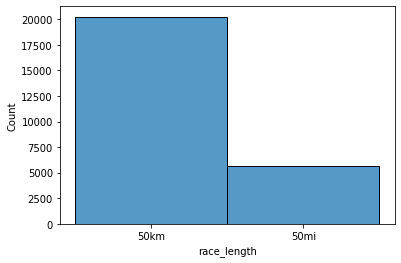

In [87]:
# Charts and graphs 
sns.histplot(df_2['race_length'])

As we can see the 50 miles races are lower and it make sense as it is more challenging 

<AxesSubplot:xlabel='race_length', ylabel='Count'>

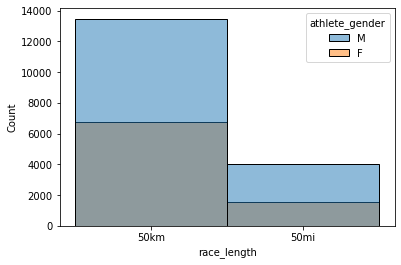

In [88]:
sns.histplot(df_2, x = 'race_length' , hue = 'athlete_gender')

Also here the male athelete are far more than the female in both 50km and 50milies races


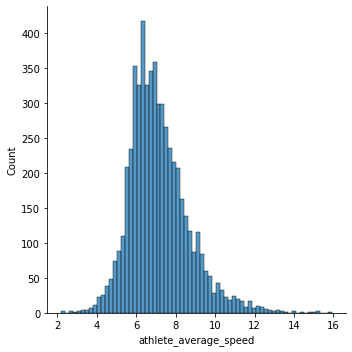

In [89]:
sns.displot(df_2[df_2['race_length'] == '50mi']['athlete_average_speed'])

<AxesSubplot:xlabel='race_length', ylabel='athlete_average_speed'>

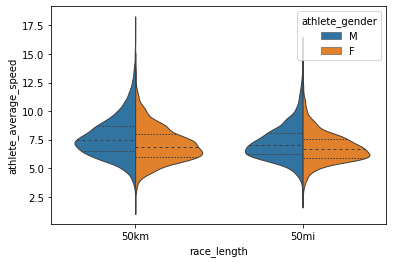

In [90]:
sns.violinplot(data = df_2 ,x = 'race_length' , y = 'athlete_average_speed' , hue = 'athlete_gender' , split = True , inner = 'quart' , linewidth=1)

As we can see males are slightly faster than females and the average speed are nearly the same between the 50 km and 50 milies races 


#### Questions i want to find from the data 


Difference in speed for the 50km,50 mi male to female 

In [91]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25857 entries, 2539945 to 2760961
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_of_event              25857 non-null  int64  
 1   event_dates                25857 non-null  object 
 2   event_name                 25857 non-null  object 
 3   race_length                25857 non-null  object 
 4   event_number_of_finishers  25857 non-null  int64  
 5   athlete_performance        25857 non-null  object 
 6   athlete_gender             25857 non-null  object 
 7   athlete_average_speed      25857 non-null  float64
 8   athlete_id                 25857 non-null  int64  
 9   athlete_age                25857 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 3.1+ MB


In [92]:
df_2.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

What age groups are the best in the 50 mi race ( age of athletes 20+ )

In [103]:
df_2.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('athlete_age>19')

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [104]:
df_2.head()

,year_of_event,event_dates,event_name,race_length,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


#### Seasons for data --> slower in summer or winter 

spring 3-5

summer 6-8

fall 9-11

winter 12-2



In [109]:
df_2['race_month'] = df_2['event_dates'].str.split('.').str.get(1).astype(int)

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\962440710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['race_month'] = df_2['event_dates'].str.split('.').str.get(1).astype(int)


In [111]:
df_2['race_season'] = df_2['race_month'].apply(lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 5 else 'spring' if x > 2 else 'winter')

C:\Users\dell\AppData\Local\Temp\ipykernel_9764\1482142592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['race_season'] = df_2['race_month'].apply(lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 5 else 'spring' if x > 2 else 'winter')


In [114]:
df_2.groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False)

,mean,count
race_season,,
spring,7.684430,3294
winter,7.518187,11595
fall,7.406619,8315
summer,6.869336,2653


as we can see the average speed and also the number of athletes are lower in summer 